In [1]:
import numpy as np 
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import os

In [2]:
def rms_1684(z):
    perc_16=np.percentile(z,16)
    perc_84=np.percentile(z,84)
    r_1684=(perc_84-perc_16)/2.0
    return r_1684

In [3]:
homedir=os.getenv('HOME')
workdir=homedir+'/Desktop/TESI/figure/'
fname_ssp=homedir+'/Desktop/TESI/models/ssp/'+'bc2003_hr_xmiless_m{:02d}_chab_ssp_idx.fits'
SSP=[22,32,42,52,62,72]
n_ssp=np.size(SSP)

In [4]:
d4000nssp_matrix=np.ones([221,6])
hghdssp_matrix=np.ones([221,6])

In [5]:
for i in range (0, n_ssp):
    hdul_ssp=fits.open(fname_ssp.format(SSP[i]))
    d4000nssp_matrix[...,i]=hdul_ssp[1].data['D4000n']
    hghdssp_matrix[...,i]=hdul_ssp[1].data['HdHg']

In [6]:
np.size(d4000nssp_matrix[...,1])

221

In [7]:
hdul_ini=fits.open(homedir+'/Desktop/TESI/models/Sandage_varZ_v4.1eq_bc03MILES_ChFall/sandage_varZ_v4.1eq_spec_dcomb_idx_001.fits')
hdul_ini1=fits.open(homedir+'/Desktop/TESI/models/Sandage_varZ_v4.1eq_bc03MILES_ChFall/sandage_varZ_v4.1eq_spec_dcomb_001_physpar_wagef.fits')

D4000n_matrix01=hdul_ini[1].data['D4000n']
D4000n=D4000n_matrix01[...,4]
HdHg_matrix01=hdul_ini[1].data['HdHg']
HdHg=HdHg_matrix01[...,4]

lw_age_matrix01=hdul_ini1[1].data['LW_AGE']
LW_ageu=lw_age_matrix01[...,0]
LW_ageg=lw_age_matrix01[...,1]
LW_ager=lw_age_matrix01[...,2]
LW_agei=lw_age_matrix01[...,3]
LW_agez=lw_age_matrix01[...,4]

MW_age=hdul_ini1[1].data['MFORMW_AGE']
MW_logage=np.log10(hdul_ini1[1].data['MFORMW_LOGAGE'])
MPW_age=hdul_ini1[1].data['MPRESW_AGE']

A_lambda_matrix01=hdul_ini1[1].data['A_LAMBDA']
A_lambdau=A_lambda_matrix01[...,0]
A_lambdag=A_lambda_matrix01[...,1]
A_lambdar=A_lambda_matrix01[...,2]
A_lambdai=A_lambda_matrix01[...,3]
A_lambdaz=A_lambda_matrix01[...,4]


logZ_matrix01=hdul_ini1[1].data['LW_Z']
logZu=logZ_matrix01[...,0]
logZg=logZ_matrix01[...,1]
logZr=logZ_matrix01[...,2]
logZi=logZ_matrix01[...,3]
logZz=logZ_matrix01[...,4]

age10=hdul_ini1[1].data['age10']
age25=hdul_ini1[1].data['age25']
age50=hdul_ini1[1].data['age50']
age75=hdul_ini1[1].data['age75']
age90=hdul_ini1[1].data['age90']



In [8]:
hdul=fits.open(homedir+'/Desktop/TESI/tesi_par.fits')  #t_f parameters
hdul2=fits.open(homedir+'/Desktop/TESI/sandage_varZ_v4.1eq.fits')   #t_obs, tau, metallicity, bursts

fname_idx=homedir+'/Desktop/TESI/models/Sandage_varZ_v4.1eq_bc03MILES_ChFall/sandage_varZ_v4.1eq_spec_dcomb_idx_{:03d}.fits'
fname=homedir+'/Desktop/TESI/models/Sandage_varZ_v4.1eq_bc03MILES_ChFall/sandage_varZ_v4.1eq_spec_dcomb_{:03d}_physpar_wagef.fits'

for i in range(2,41):
    hdul4=fits.open(fname.format(i)) #ages
    hdul1=fits.open(fname_idx.format(i))  #spectral indices
    D4000n_matrix=hdul1[1].data['D4000n']
    d4000n=D4000n_matrix[...,4]
    D4000n=np.append(D4000n,d4000n)
    HdHg_matrix=hdul1[1].data['HdHg']
    hdhg=HdHg_matrix[...,4]
    HdHg=np.append(HdHg,hdhg)
    
    lw_age_matrix=hdul4[1].data['LW_AGE']
    lw_ageu=lw_age_matrix[...,0]
    LW_ageu=np.append(LW_ageu,lw_ageu)
    lw_ageg=lw_age_matrix[...,1]
    LW_ageg=np.append(LW_ageg,lw_ageg)
    lw_ager=lw_age_matrix[...,2]
    LW_ager=np.append(LW_ager,lw_ager)
    lw_agei=lw_age_matrix[...,3]
    LW_agei=np.append(LW_agei,lw_agei)
    lw_agez=lw_age_matrix[...,4]
    LW_agez=np.append(LW_agez,lw_agez)
    
    mw_age=hdul4[1].data['MFORMW_AGE']
    MW_age=np.append(MW_age,mw_age)
    mw_logage=np.log10(hdul4[1].data['MFORMW_LOGAGE'])
    MW_logage=np.append(MW_logage,mw_logage)
    mpw_age=hdul4[1].data['MPRESW_AGE']
    MPW_age=np.append(MPW_age, mpw_age)
    
    A_lambda_matrix=hdul4[1].data['A_LAMBDA']
    a_lambdar=A_lambda_matrix[...,2]
    A_lambdar=np.append(A_lambdar,a_lambdar)
    
    logZ_matrix=hdul4[1].data['LW_Z']
    logzr=logZ_matrix[...,2]
    logZr=np.append(logZr,logzr)
    
    _age10=hdul4[1].data['age10']
    _age25=hdul4[1].data['age25']
    _age50=hdul4[1].data['age50']
    _age75=hdul4[1].data['age75']
    _age90=hdul4[1].data['age90']
    age10=np.append(age10, _age10)
    age25=np.append(age25, _age25)
    age50=np.append(age50, _age50)
    age75=np.append(age75, _age75)
    age90=np.append(age90, _age90)

    
    hdul4.close()
    hdul1.close()

In [9]:
log_tobs=hdul2[1].data['LOGTFORM']
N_burst=hdul2[1].data['NBURST']



log_age10=np.log10(age10)
log_age90=np.log10(age90)
log_age25=np.log10(age25)
log_age75=np.log10(age75)



Statistic

In [10]:
n_bins=50
r=stats.binned_statistic_2d(D4000n,HdHg,None,bins=n_bins,statistic='count',expand_binnumbers=True )
y,x=np.meshgrid(r.y_edge,r.x_edge)

med90=stats.binned_statistic_2d(D4000n,HdHg,log_age90,bins=n_bins,statistic='median',expand_binnumbers=True )
age90_rms1684=stats.binned_statistic_2d(D4000n,HdHg,log_age90,bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
med10=stats.binned_statistic_2d(D4000n,HdHg,log_age10,bins=n_bins,statistic='median',expand_binnumbers=True )
age10_rms1684=stats.binned_statistic_2d(D4000n,HdHg,log_age10,bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
med50=stats.binned_statistic_2d(D4000n,HdHg,np.log10(age50),bins=n_bins,statistic='median',expand_binnumbers=True )
age50_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(age50),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
med75=stats.binned_statistic_2d(D4000n,HdHg,np.log10(age75),bins=n_bins,statistic='median',expand_binnumbers=True )
age75_rms1684=stats.binned_statistic_2d(D4000n,HdHg,log_age75,bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
med25=stats.binned_statistic_2d(D4000n,HdHg,np.log10(age25),bins=n_bins,statistic='median',expand_binnumbers=True )
age25_rms1684=stats.binned_statistic_2d(D4000n,HdHg,log_age25,bins=n_bins,statistic=rms_1684,expand_binnumbers=True )


Text(0.5, 0, 'D4000n')

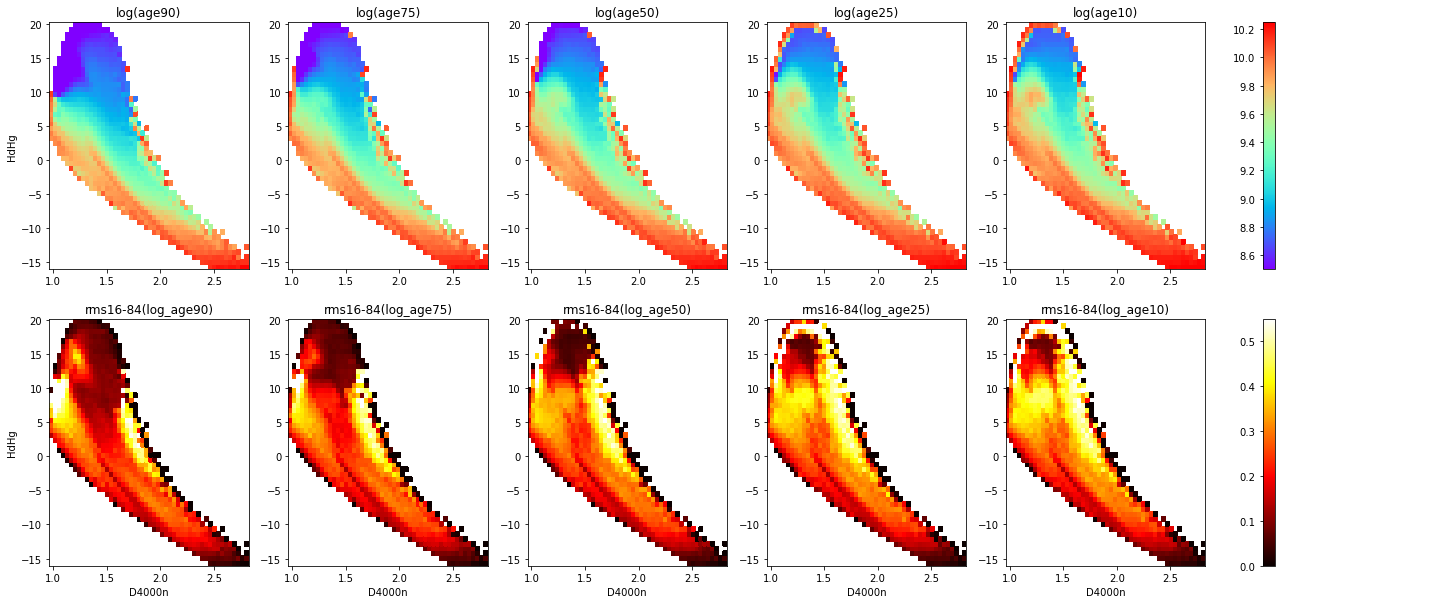

In [11]:
fig,axs=plt.subplots(2,6,figsize=(25,10))
axs[0, 0].pcolormesh(x,y,med90.statistic,cmap=cm.rainbow,vmin=8.50,vmax=10.25)
axs[0, 0].set_title('log(age90)')
axs[0, 1].pcolormesh(x,y,med75.statistic,cmap=cm.rainbow,vmin=8.50,vmax=10.25)
axs[0, 1].set_title('log(age75)')
axs[0, 2].pcolormesh(x,y,med50.statistic,cmap=cm.rainbow,vmin=8.50,vmax=10.25)
axs[0, 2].set_title('log(age50)')
axs[0, 3].pcolormesh(x,y,med25.statistic,cmap=cm.rainbow,vmin=8.50,vmax=10.25)
axs[0, 3].set_title('log(age25)')

axs[1, 0].pcolormesh(x,y,age90_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs[1, 0].set_title('rms16-84(log_age90)')
axs[1, 1].pcolormesh(x,y,age75_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs[1, 1].set_title('rms16-84(log_age75)')
axs[1, 2].pcolormesh(x,y,age50_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs[1, 2].set_title('rms16-84(log_age50)')
axs[1, 3].pcolormesh(x,y,age25_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs[1, 3].set_title('rms16-84(log_age25)')



plt10=axs[0,4].pcolormesh(x,y,med10.statistic,cmap=cm.rainbow,vmin=8.50,vmax=10.25)
plt_std10=axs[1,4].pcolormesh(x,y,age10_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs[1,4].set_title('rms16-84(log_age10)')
axs[0, 4].set_title('log(age10)')
#fig.colorbar(plt10, ax=[axs[0,2]], location='right')
#axs[1,3].colorbar(plt10)
fig.colorbar(plt10, ax=[axs[0,5]], location='left')
axs[0,5].axis('off')
fig.colorbar(plt_std10, ax=[axs[1,5]], location='left')
axs[1,5].axis('off')
axs[0,0].set_ylabel('HdHg')
axs[1,0].set_ylabel('HdHg')
axs[1,0].set_xlabel('D4000n')
axs[1,1].set_xlabel('D4000n')
axs[1,2].set_xlabel('D4000n')
axs[1,3].set_xlabel('D4000n')
axs[1,4].set_xlabel('D4000n')


In [12]:
#fig.savefig(workdir+'age_f.png')

In [13]:
np.size(LW_ager)

500000

In [14]:
med_logmwage=stats.binned_statistic_2d(D4000n,HdHg,np.log10(MW_age),bins=n_bins,statistic='median',expand_binnumbers=True )
agemw_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(MW_age),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
med_loglwage_r=stats.binned_statistic_2d(D4000n,HdHg,np.log10(LW_ager),bins=n_bins,statistic='median',expand_binnumbers=True )
agelw_r_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(LW_ager),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
med_logage_mw=stats.binned_statistic_2d(D4000n,HdHg,MW_logage,bins=n_bins,statistic='median',expand_binnumbers=True )
logagemw_rms1684=stats.binned_statistic_2d(D4000n,HdHg,MW_logage,bins=n_bins,statistic=rms_1684,expand_binnumbers=True )


Text(0.5, 1.0, 'rms16-84_mwlogage')

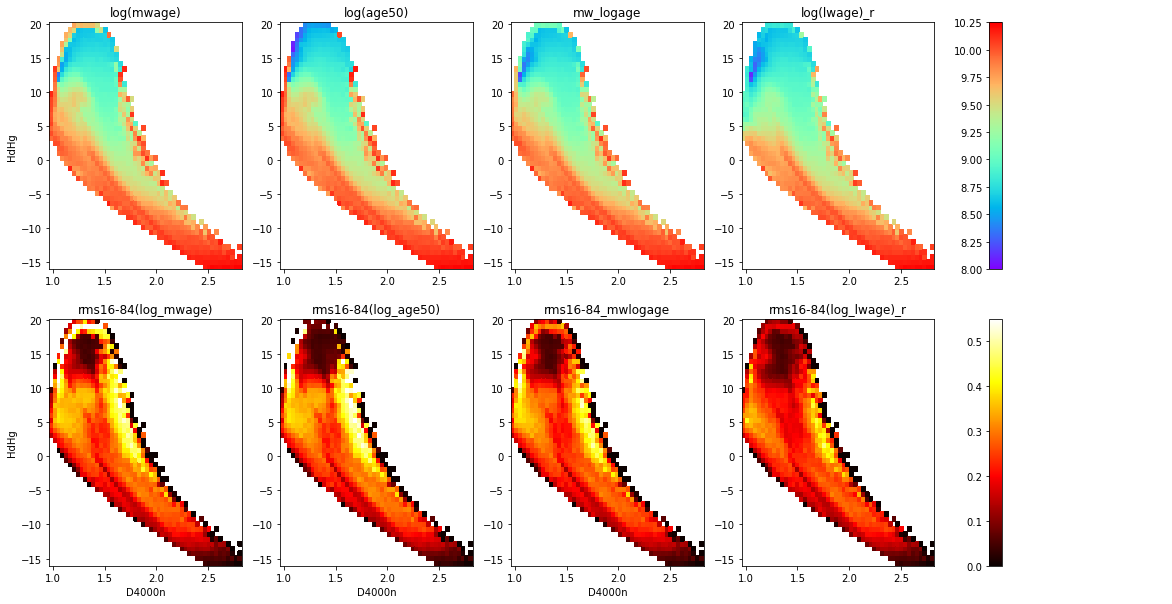

In [15]:
fig,axs=plt.subplots(2,5,figsize=(20,10))
axs[0, 0].pcolormesh(x,y,med_logmwage.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
axs[0, 0].set_title('log(mwage)')
axs[0, 1].pcolormesh(x,y,med50.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
axs[0, 1].set_title('log(age50)')
axs[1, 0].pcolormesh(x,y,agemw_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs[1, 0].set_title('rms16-84(log_mwage)')
axs[1, 1].pcolormesh(x,y,age50_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs[1, 1].set_title('rms16-84(log_age50)')
plt10=axs[0,3].pcolormesh(x,y,med_loglwage_r.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
plt_std10=axs[1,3].pcolormesh(x,y,agelw_r_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs[1,3].set_title('rms16-84(log_lwage)_r')
axs[0, 3].set_title('log(lwage)_r')
#fig.colorbar(plt10, ax=[axs[0,2]], location='right')
#axs[1,3].colorbar(plt10)
fig.colorbar(plt10, ax=[axs[0,4]], location='left')
axs[0,4].axis('off')
fig.colorbar(plt_std10, ax=[axs[1,4]], location='left')
axs[1,4].axis('off')
axs[0,0].set_ylabel('HdHg')
axs[1,0].set_ylabel('HdHg')
axs[1,0].set_xlabel('D4000n')
axs[1,1].set_xlabel('D4000n')
axs[1,2].set_xlabel('D4000n')
axs[0,2].pcolormesh(x,y,med_logage_mw.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
axs[0,2].set_title('mw_logage')
axs[1,2].pcolormesh(x,y,logagemw_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs[0,2].set_title('mw_logage')
axs[1,2].set_title('rms16-84_mwlogage')

In [16]:
#fig.savefig(workdir+'age_mw_lw_log.png')

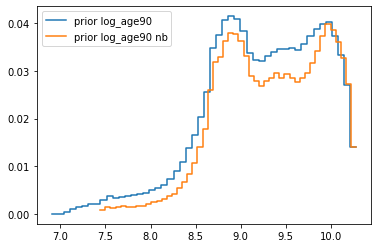

In [17]:
idx_noburst=np.where(N_burst==0)
log_age90nb=log_age90[idx_noburst[0]]
log_age10nb=log_age10[idx_noburst[0]]

ist90=np.histogram(log_age90, bins=50)
p90=ist90[0]/np.size(log_age90)
p90_new=np.append(p90[0],p90)
ist90nb=np.histogram(log_age90nb, bins=50)
p90nb=ist90nb[0]/np.size(log_age90nb)
p90_newnb=np.append(p90nb[0],p90nb)

plt.step(ist90[1],p90_new,label='prior log_age90')
plt.step(ist90nb[1],p90_newnb,label='prior log_age90 nb')
plt.legend(loc='upper left')


In [18]:
#plt.savefig(workdir+'prior90.png')

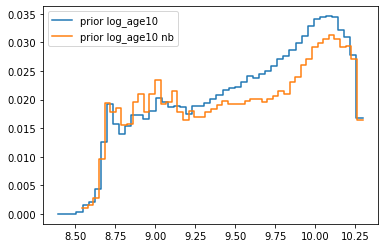

In [19]:
ist10=np.histogram(log_age10, bins=50)
p10=ist10[0]/np.size(log_age10)
p10_new=np.append(p10[0],p10)
ist10nb=np.histogram(log_age10nb, bins=50)
p10nb=ist10nb[0]/np.size(log_age10nb)
p10_newnb=np.append(p10nb[0],p10nb)
plt.step(ist10[1],p10_new,label='prior log_age10')
plt.step(ist10nb[1],p10_newnb,label='prior log_age10 nb')
plt.legend(loc='upper left')

In [20]:
#plt.savefig('prior10.png')

In [21]:
log_age25nb=log_age25[idx_noburst[0]]
log_age75nb=log_age75[idx_noburst[0]]
MW_agenb=MW_age[idx_noburst[0]]

med_mwage_7525=stats.binned_statistic_2d(log_age75,log_age25,np.log10(MW_age),bins=n_bins,statistic='median',expand_binnumbers=True )
agemw_7525_rms1684=stats.binned_statistic_2d(log_age75,log_age25,np.log10(MW_age),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )

med_mwage_7525nb=stats.binned_statistic_2d(log_age75nb,log_age25nb,np.log10(MW_agenb),bins=n_bins,statistic='median',expand_binnumbers=True )
agemw_7525nb_rms1684=stats.binned_statistic_2d(log_age75nb,log_age25nb,np.log10(MW_agenb),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )


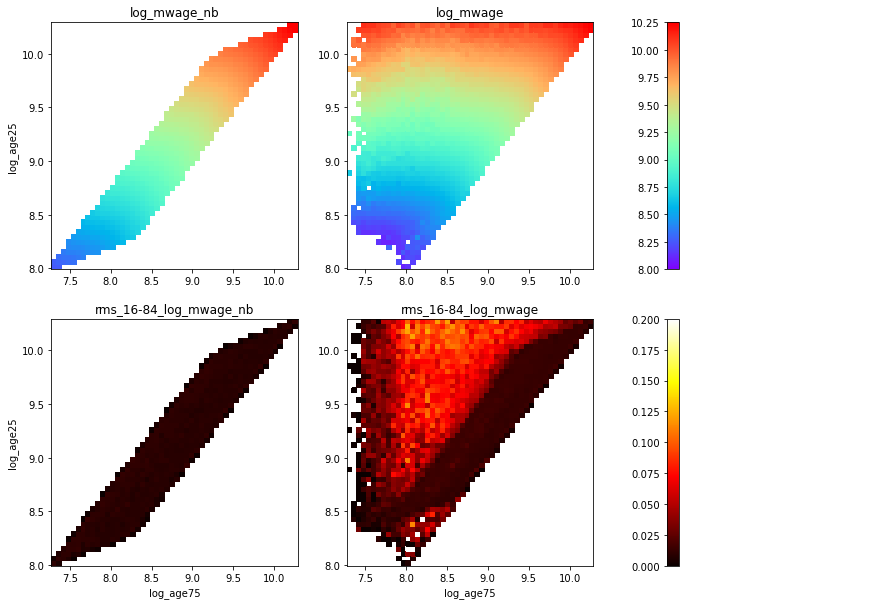

In [22]:
y25,x75=np.meshgrid(med_mwage_7525.y_edge,med_mwage_7525.x_edge)
fig1,axs1=plt.subplots(2,3,figsize=(15,10))
#axs1[0,0].pcolormesh(x75,y25,med_mwage_7525.statistic,cmap=cm.rainbow)
plt1=axs1[0,1].pcolormesh(x75,y25,med_mwage_7525.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
plt2=axs1[1,1].pcolormesh(x75,y25,agemw_7525_rms1684.statistic, cmap=cm.hot,vmin=0.0,vmax=0.2)
fig.colorbar(plt2, ax=[axs1[1,2]], location='left')
fig.colorbar(plt1, ax=[axs1[0,2]], location='left')

axs1[1,1].set_xlabel('log_age75')
axs1[0,0].set_ylabel('log_age25')
axs1[1,0].set_xlabel('log_age75')
axs1[1,0].set_ylabel('log_age25')
axs1[0,2].axis('off')
axs1[1,2].axis('off')
axs1[1,1].set_title('rms_16-84_log_mwage')
axs1[0,1].set_title('log_mwage')      
axs1[1,0].set_title('rms_16-84_log_mwage_nb')
axs1[0,0].set_title('log_mwage_nb')      

axs1[0,0].pcolormesh(x75,y25,med_mwage_7525nb.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
axs1[1,0].pcolormesh(x75,y25,agemw_7525nb_rms1684.statistic, cmap=cm.hot,vmin=0.0,vmax=0.2)

In [23]:
#fig1.savefig(workdir+'log_mwage_2575.png')

In [24]:
idx_lowdust_noburst=np.where((A_lambdar<0.2)&(N_burst==0))
idx_lowdust=np.where(A_lambdar<0.2)
idx_lowdust_lowz=np.where((logZr<0.05)&(logZr>-0.05)&(A_lambdar<0.2))

MW_age_lowdust_noburst=MW_age[idx_lowdust_noburst[0]]
D4000n_lowdust_noburst=D4000n[idx_lowdust_noburst[0]]
HdHg_lowdust_noburst=HdHg[idx_lowdust_noburst[0]]

MW_age_lowdust=MW_age[idx_lowdust[0]]
D4000n_lowdust=D4000n[idx_lowdust[0]]
HdHg_lowdust=HdHg[idx_lowdust[0]]

MW_age_lowdust_lowz=MW_age[idx_lowdust_lowz[0]]
D4000n_lowdust_lowz=D4000n[idx_lowdust_lowz[0]]
HdHg_lowdust_lowz=HdHg[idx_lowdust_lowz[0]]

In [25]:
med_logmwage_ld_nb=stats.binned_statistic_2d(D4000n_lowdust_noburst,HdHg_lowdust_noburst,np.log10(MW_age_lowdust_noburst),bins=[r.x_edge,r.y_edge],statistic='median',expand_binnumbers=True )
agemw_rms1684_ld_nb=stats.binned_statistic_2d(D4000n_lowdust_noburst,HdHg_lowdust_noburst,np.log10(MW_age_lowdust_noburst),bins=[r.x_edge,r.y_edge],statistic=rms_1684,expand_binnumbers=True )

med_logmwage_ld=stats.binned_statistic_2d(D4000n_lowdust,HdHg_lowdust,np.log10(MW_age_lowdust),bins=[r.x_edge,r.y_edge],statistic='median',expand_binnumbers=True )
agemw_rms1684_ld=stats.binned_statistic_2d(D4000n_lowdust,HdHg_lowdust,np.log10(MW_age_lowdust),bins=[r.x_edge,r.y_edge],statistic=rms_1684,expand_binnumbers=True )

med_logmwage_ld_lz=stats.binned_statistic_2d(D4000n_lowdust_lowz,HdHg_lowdust_lowz,np.log10(MW_age_lowdust_lowz),bins=[r.x_edge,r.y_edge],statistic='median',expand_binnumbers=True )
agemw_rms1684_ld_lz=stats.binned_statistic_2d(D4000n_lowdust_lowz,HdHg_lowdust_lowz,np.log10(MW_age_lowdust_lowz),bins=[r.x_edge,r.y_edge],statistic=rms_1684,expand_binnumbers=True )


Text(0.5, 1.0, 'log_mwage_dust<0.2')

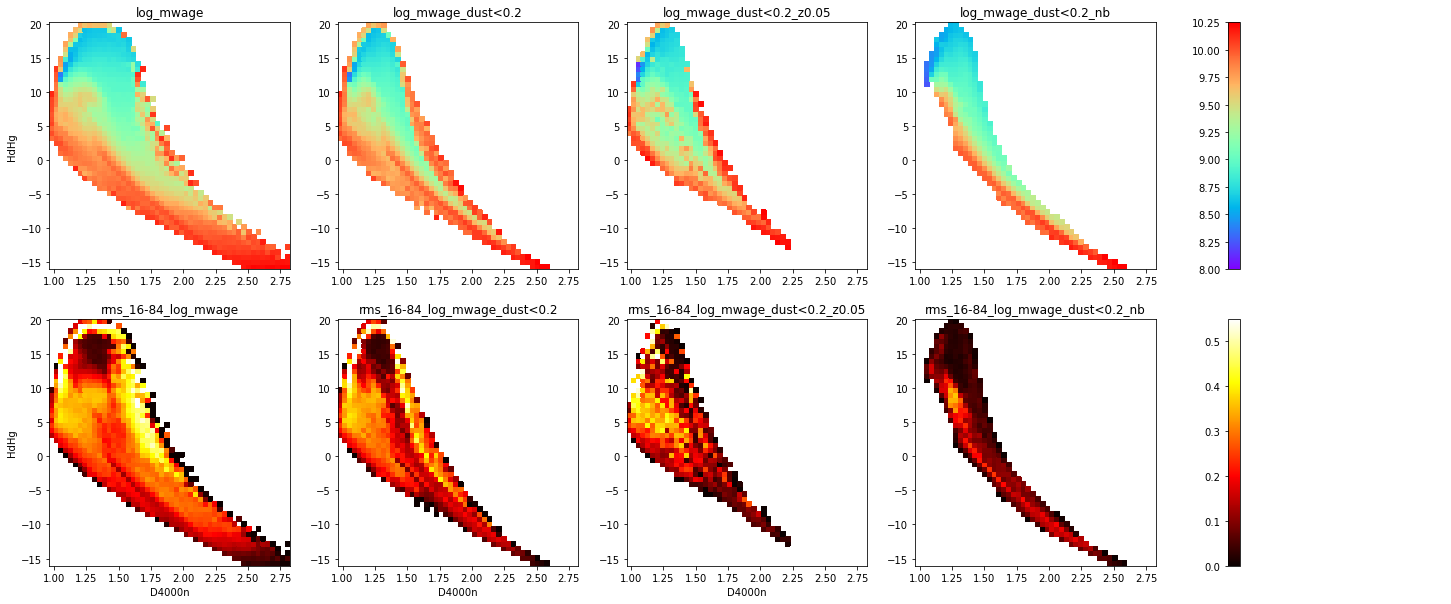

In [26]:
fig1,axs1=plt.subplots(2,5,figsize=(25,10))
plt1_ld=axs1[0,3].pcolormesh(x,y,med_logmwage_ld_nb.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
plt2_ld=axs1[1,3].pcolormesh(x,y,agemw_rms1684_ld_nb.statistic, cmap=cm.hot,vmin=0.0,vmax=0.55)
fig.colorbar(plt2_ld, ax=[axs1[1,4]], location='left')
fig.colorbar(plt1_ld, ax=[axs1[0,4]], location='left')
axs1[1,2].set_xlabel('D4000n')
axs1[1,0].set_xlabel('D4000n')
axs1[0,0].set_ylabel('HdHg')
axs1[1,1].set_xlabel('D4000n')
axs1[1,0].set_ylabel('HdHg')

axs1[0,4].axis('off')
axs1[1,4].axis('off')
axs1[1,3].set_title('rms_16-84_log_mwage_dust<0.2_nb')
axs1[0,3].set_title('log_mwage_dust<0.2_nb')

axs1[0,2].pcolormesh(x,y,med_logmwage_ld_lz.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
axs1[1,2].pcolormesh(x,y,agemw_rms1684_ld_lz.statistic, cmap=cm.hot,vmin=0.0,vmax=0.55)
axs1[1,2].set_title('rms_16-84_log_mwage_dust<0.2_z0.05')
axs1[0,2].set_title('log_mwage_dust<0.2_z0.05')
axs1[0,0].pcolormesh(x,y,med_logmwage.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
axs1[1,0].pcolormesh(x,y,agemw_rms1684.statistic, cmap=cm.hot,vmin=0.0,vmax=0.55)
axs1[1,0].set_title('rms_16-84_log_mwage')
axs1[0,0].set_title('log_mwage')
axs1[0,1].pcolormesh(x,y,med_logmwage_ld.statistic,cmap=cm.rainbow, vmin=8.0,vmax=10.25)
axs1[1,1].pcolormesh(x,y,agemw_rms1684_ld.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs1[1,1].set_title('rms_16-84_log_mwage_dust<0.2')
axs1[0,1].set_title('log_mwage_dust<0.2')

In [27]:
#fig1.savefig(workdir+'log_mwage_dust_z_nb.png')

In [28]:
#hdul_ini.close()
#hdul_ini1.close()
#hdul.close()
#hdul2.close()

In [29]:
log_age10nb=log_age10[idx_noburst[0]]
log_age90nb=log_age90[idx_noburst[0]]
#MW_agenb=MW_age[idx_noburst[0]]

med_mwage_9010=stats.binned_statistic_2d(log_age90,log_age10,np.log10(MW_age),bins=n_bins,statistic='median',expand_binnumbers=True )
agemw_9010_rms1684=stats.binned_statistic_2d(log_age90,log_age10,np.log10(MW_age),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )

med_mwage_9010nb=stats.binned_statistic_2d(log_age90nb,log_age10nb,np.log10(MW_agenb),bins=n_bins,statistic='median',expand_binnumbers=True )
agemw_9010nb_rms1684=stats.binned_statistic_2d(log_age90nb,log_age10nb,np.log10(MW_agenb),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )


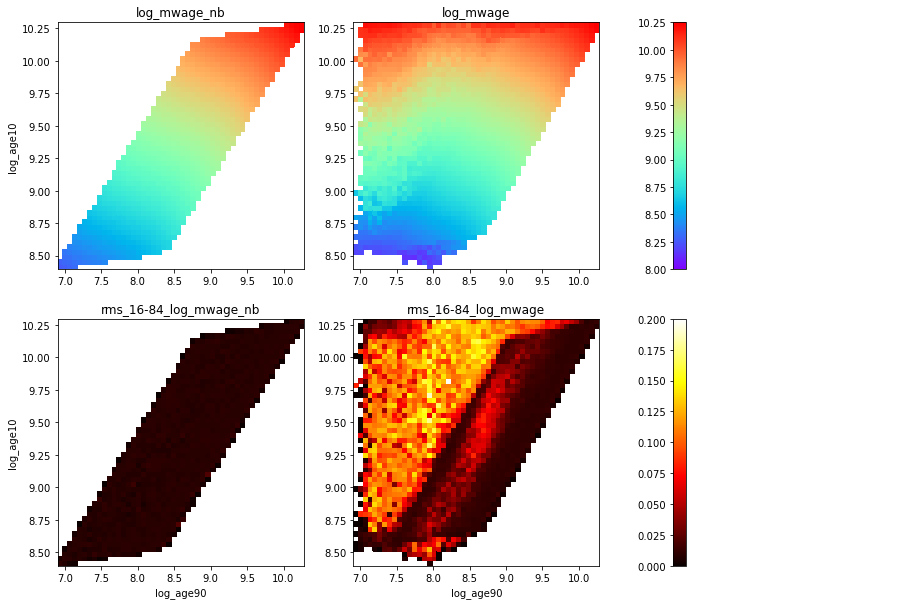

In [30]:
y10,x90=np.meshgrid(med_mwage_9010.y_edge,med_mwage_9010.x_edge)
fig1,axs1=plt.subplots(2,3,figsize=(15,10))
#axs1[0,0].pcolormesh(x75,y25,med_mwage_7525.statistic,cmap=cm.rainbow)
plt1=axs1[0,1].pcolormesh(x90,y10,med_mwage_9010.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
plt2=axs1[1,1].pcolormesh(x90,y10,agemw_9010_rms1684.statistic, cmap=cm.hot,vmin=0.0,vmax=0.2)
fig.colorbar(plt2, ax=[axs1[1,2]], location='left')
fig.colorbar(plt1, ax=[axs1[0,2]], location='left')

axs1[1,1].set_xlabel('log_age90')
axs1[0,0].set_ylabel('log_age10')
axs1[1,0].set_xlabel('log_age90')
axs1[1,0].set_ylabel('log_age10')
axs1[0,2].axis('off')
axs1[1,2].axis('off')
axs1[1,1].set_title('rms_16-84_log_mwage')
axs1[0,1].set_title('log_mwage')      
axs1[1,0].set_title('rms_16-84_log_mwage_nb')
axs1[0,0].set_title('log_mwage_nb')      

axs1[0,0].pcolormesh(x90,y10,med_mwage_9010nb.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
axs1[1,0].pcolormesh(x90,y10,agemw_9010nb_rms1684.statistic, cmap=cm.hot,vmin=0.0,vmax=0.2)

In [31]:
#fig1.savefig(workdir+'log_mwage_1090.png')

In [32]:
age25_nb=age25[idx_noburst[0]]
age10_nb=age10[idx_noburst[0]]
age90_nb=age90[idx_noburst[0]]
D4000n_nb=D4000n[idx_noburst[0]]
HdHg_nb=HdHg[idx_noburst[0]]
MW_age_nb=MW_age[idx_noburst[0]]

In [33]:
age2590_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(age25-age90),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
age1090_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(age10-age90),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
age10_age90=stats.binned_statistic_2d(D4000n,HdHg,(age10-age90),bins=n_bins,statistic='median',expand_binnumbers=True )
age25_age90=stats.binned_statistic_2d(D4000n,HdHg,(age25-age90),bins=n_bins,statistic='median',expand_binnumbers=True )

<ipython-input-33-f0145ba3d3ff>:1: RuntimeWarning: divide by zero encountered in log10
  age2590_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(age25-age90),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )


In [34]:
age2590nb_rms1684=stats.binned_statistic_2d(D4000n_nb,HdHg_nb,np.log10(age25_nb-age90_nb),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
age1090nb_rms1684=stats.binned_statistic_2d(D4000n_nb,HdHg_nb,np.log10(age10_nb-age90_nb),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
age10_age90nb=stats.binned_statistic_2d(D4000n_nb,HdHg_nb,age10_nb-age90_nb,bins=n_bins,statistic='median',expand_binnumbers=True )
age25_age90nb=stats.binned_statistic_2d(D4000n_nb,HdHg_nb,(age25_nb-age90_nb),bins=n_bins,statistic='median',expand_binnumbers=True )

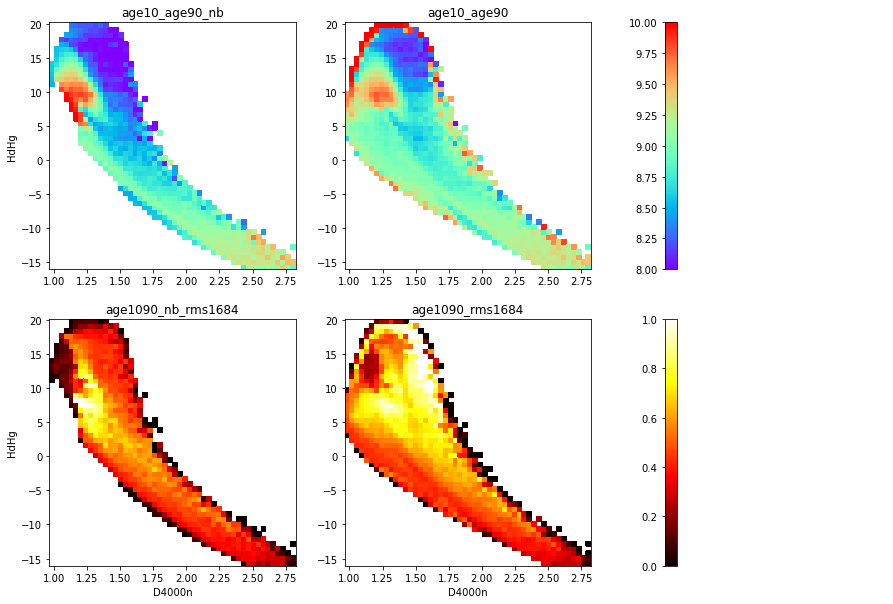

In [35]:
fig1,axs1=plt.subplots(2,3,figsize=(15,10))
plt1=axs1[0,1].pcolormesh(x,y,np.log10(age10_age90.statistic),cmap=cm.rainbow,vmin=8.0,vmax=10.00)
plt2=axs1[1,1].pcolormesh(x,y,(age1090_rms1684.statistic), cmap=cm.hot,vmin=0.0,vmax=1.0)
fig.colorbar(plt2, ax=[axs1[1,2]], location='left')
fig.colorbar(plt1, ax=[axs1[0,2]], location='left')

axs1[1,1].set_xlabel('D4000n')
axs1[0,0].set_ylabel('HdHg')
axs1[1,0].set_xlabel('D4000n')
axs1[1,0].set_ylabel('HdHg')
axs1[0,2].axis('off')
axs1[1,2].axis('off')
axs1[1,1].set_title('age1090_rms1684')
axs1[0,1].set_title('age10_age90')      
axs1[1,0].set_title('age1090_nb_rms1684')
axs1[0,0].set_title('age10_age90_nb')      

axs1[0,0].pcolormesh(x,y,np.log10(age10_age90nb.statistic),cmap=cm.rainbow,vmin=8.0,vmax=10.00)
axs1[1,0].pcolormesh(x,y,(age1090nb_rms1684.statistic), cmap=cm.hot,vmin=0.0,vmax=1.0)

In [36]:
#fig1.savefig(workdir+'age1090_balmerplane.png')

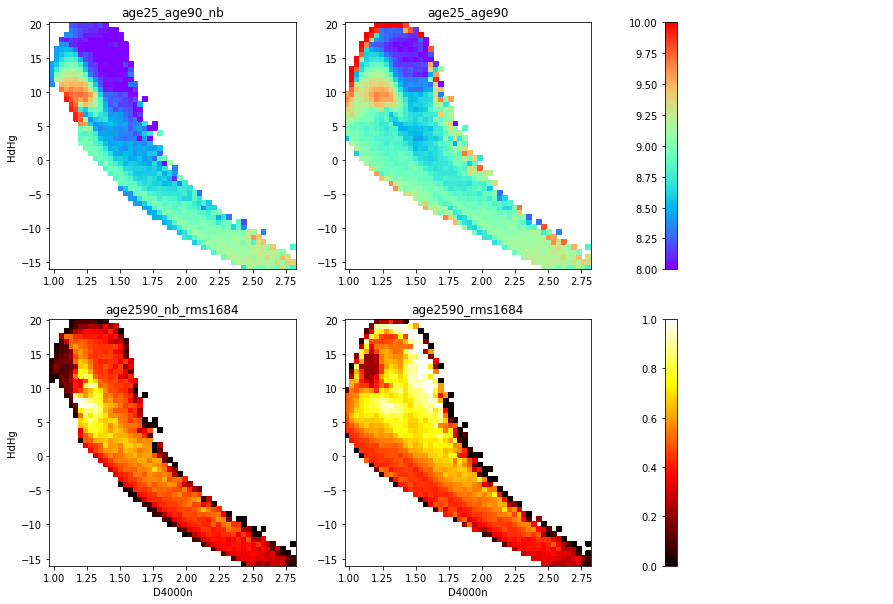

In [37]:
fig1,axs1=plt.subplots(2,3,figsize=(15,10))
plt1=axs1[0,1].pcolormesh(x,y,np.log10(age25_age90.statistic),cmap=cm.rainbow,vmin=8.0,vmax=10.00)
plt2=axs1[1,1].pcolormesh(x,y,(age2590_rms1684.statistic), cmap=cm.hot,vmin=0.0,vmax=1.0)
fig.colorbar(plt2, ax=[axs1[1,2]], location='left')
fig.colorbar(plt1, ax=[axs1[0,2]], location='left')

axs1[1,1].set_xlabel('D4000n')
axs1[0,0].set_ylabel('HdHg')
axs1[1,0].set_xlabel('D4000n')
axs1[1,0].set_ylabel('HdHg')
axs1[0,2].axis('off')
axs1[1,2].axis('off')
axs1[1,1].set_title('age2590_rms1684')
axs1[0,1].set_title('age25_age90')      
axs1[1,0].set_title('age2590_nb_rms1684')
axs1[0,0].set_title('age25_age90_nb')      

axs1[0,0].pcolormesh(x,y,np.log10(age25_age90nb.statistic),cmap=cm.rainbow,vmin=8.0,vmax=10.00)
axs1[1,0].pcolormesh(x,y,(age2590nb_rms1684.statistic), cmap=cm.hot,vmin=0.0,vmax=1.0)

In [38]:
#fig1.savefig(workdir+'agemw2590_balmerplane.png')

In [39]:
age2590norm_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10((age25-age90)/MW_age),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
age25_age90norm=stats.binned_statistic_2d(D4000n,HdHg,np.log10((age25-age90)/MW_age),bins=n_bins,statistic='median',expand_binnumbers=True )
age2590nb_norm_rms1684=stats.binned_statistic_2d(D4000n_nb,HdHg_nb,np.log10((age25_nb-age90_nb)/MW_age_nb),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
age25_age90nb_norm=stats.binned_statistic_2d(D4000n_nb,HdHg_nb,np.log10((age25_nb-age90_nb)/MW_age_nb),bins=n_bins,statistic='median',expand_binnumbers=True )

<ipython-input-39-7f736ce43ecd>:1: RuntimeWarning: divide by zero encountered in log10
  age2590norm_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10((age25-age90)/MW_age),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
<ipython-input-39-7f736ce43ecd>:2: RuntimeWarning: divide by zero encountered in log10
  age25_age90norm=stats.binned_statistic_2d(D4000n,HdHg,np.log10((age25-age90)/MW_age),bins=n_bins,statistic='median',expand_binnumbers=True )


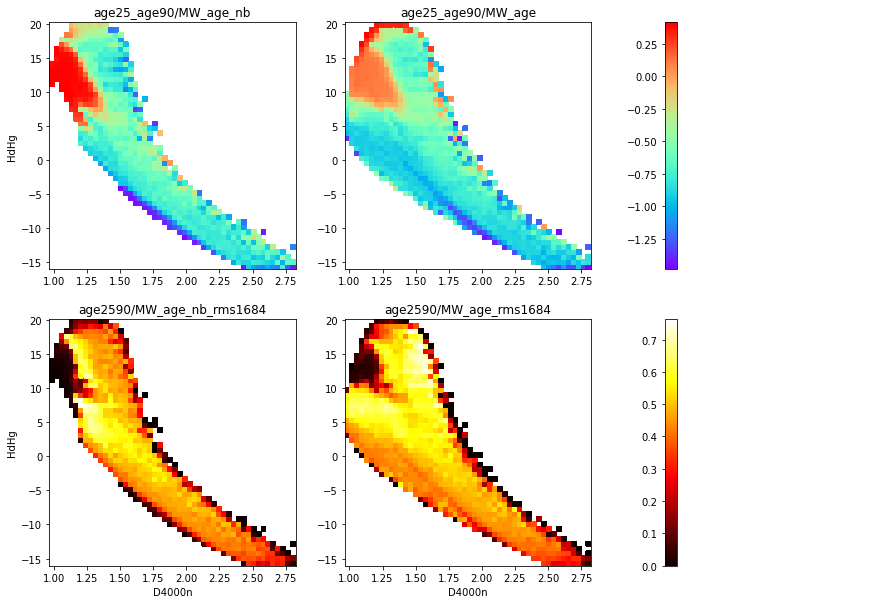

In [40]:
fig1,axs1=plt.subplots(2,3,figsize=(15,10))
plt1=axs1[0,1].pcolormesh(x,y,(age25_age90norm.statistic),cmap=cm.rainbow)
plt2=axs1[1,1].pcolormesh(x,y,(age2590norm_rms1684.statistic), cmap=cm.hot)
fig.colorbar(plt2, ax=[axs1[1,2]], location='left')
fig.colorbar(plt1, ax=[axs1[0,2]], location='left')

axs1[1,1].set_xlabel('D4000n')
axs1[0,0].set_ylabel('HdHg')
axs1[1,0].set_xlabel('D4000n')
axs1[1,0].set_ylabel('HdHg')
axs1[0,2].axis('off')
axs1[1,2].axis('off')
axs1[1,1].set_title('age2590/MW_age_rms1684')
axs1[0,1].set_title('age25_age90/MW_age')      
axs1[1,0].set_title('age2590/MW_age_nb_rms1684')
axs1[0,0].set_title('age25_age90/MW_age_nb')      

axs1[0,0].pcolormesh(x,y,(age25_age90nb_norm.statistic),cmap=cm.rainbow)
axs1[1,0].pcolormesh(x,y,(age2590nb_norm_rms1684.statistic), cmap=cm.hot)

In [41]:
#fig1.savefig(workdir+'agemw2590norm_balmerplane.png')

In [42]:
med_loglwage_u=stats.binned_statistic_2d(D4000n,HdHg,np.log10(LW_ageu),bins=n_bins,statistic='median',expand_binnumbers=True )
agelw_u_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(LW_ageu),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
med_loglwage_g=stats.binned_statistic_2d(D4000n,HdHg,np.log10(LW_ageg),bins=n_bins,statistic='median',expand_binnumbers=True )
agelw_g_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(LW_ageg),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
med_loglwage_i=stats.binned_statistic_2d(D4000n,HdHg,np.log10(LW_agei),bins=n_bins,statistic='median',expand_binnumbers=True )
agelw_i_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(LW_agei),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
med_loglwage_z=stats.binned_statistic_2d(D4000n,HdHg,np.log10(LW_agez),bins=n_bins,statistic='median',expand_binnumbers=True )
agelw_z_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(LW_agez),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )

med_logmpwage=stats.binned_statistic_2d(D4000n,HdHg,np.log10(MPW_age),bins=n_bins,statistic='median',expand_binnumbers=True )
agempw_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(MPW_age),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )

Text(0.5, 1.0, 'mpwage-mwage')

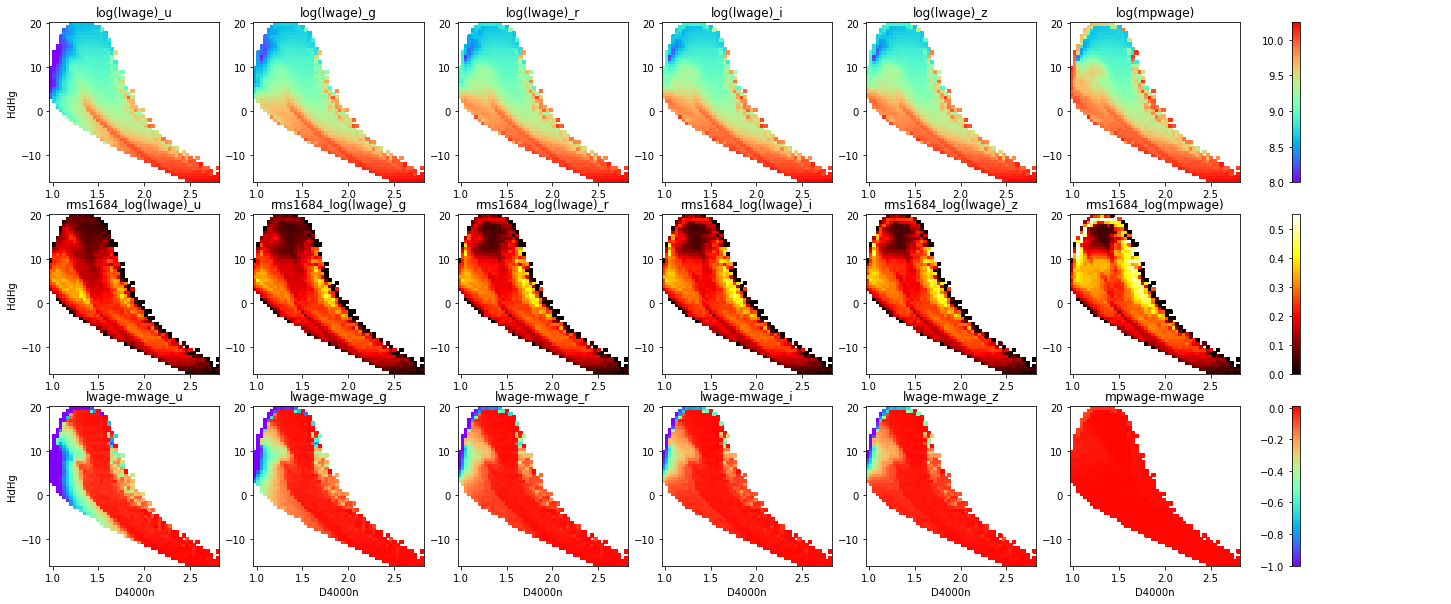

In [43]:
fig1,axs1=plt.subplots(3,7,figsize=(25,10))
plt1_ld=axs1[0,5].pcolormesh(x,y,med_logmpwage.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
plt3_ld=axs1[2,5].pcolormesh(x,y,med_logmpwage.statistic-med_logmwage.statistic,cmap=cm.rainbow,vmin=-1, vmax=0.01)
plt2_ld=axs1[1,5].pcolormesh(x,y,agempw_rms1684.statistic, cmap=cm.hot,vmin=0.0,vmax=0.55)

fig.colorbar(plt2_ld, ax=[axs1[1,6]], location='left')
fig.colorbar(plt1_ld, ax=[axs1[0,6]], location='left')
fig.colorbar(plt3_ld, ax=[axs1[2,6]], location='left')

axs1[2,2].set_xlabel('D4000n')
axs1[2,0].set_xlabel('D4000n')
axs1[0,0].set_ylabel('HdHg')
axs1[2,1].set_xlabel('D4000n')
axs1[1,0].set_ylabel('HdHg')
axs1[2,0].set_ylabel('HdHg')
axs1[2,3].set_xlabel('D4000n')
axs1[2,4].set_xlabel('D4000n')
axs1[2,5].set_xlabel('D4000n')


axs1[0,6].axis('off')
axs1[1,6].axis('off')
axs1[2,6].axis('off')


axs1[0,0].pcolormesh(x,y,med_loglwage_u.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
axs1[0,1].pcolormesh(x,y,med_loglwage_g.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
axs1[0,2].pcolormesh(x,y,med_loglwage_r.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
axs1[0,3].pcolormesh(x,y,med_loglwage_i.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)
axs1[0,4].pcolormesh(x,y,med_loglwage_z.statistic,cmap=cm.rainbow,vmin=8.0,vmax=10.25)

axs1[1,0].pcolormesh(x,y,agelw_u_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs1[1,1].pcolormesh(x,y,agelw_g_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs1[1,2].pcolormesh(x,y,agelw_r_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs1[1,3].pcolormesh(x,y,agelw_i_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)
axs1[1,4].pcolormesh(x,y,agelw_z_rms1684.statistic,cmap=cm.hot,vmin=0.0,vmax=0.55)

axs1[2,0].pcolormesh(x,y,med_loglwage_u.statistic-med_logmwage.statistic,cmap=cm.rainbow, vmin=-1, vmax=0.01)
axs1[2,1].pcolormesh(x,y,med_loglwage_g.statistic-med_logmwage.statistic,cmap=cm.rainbow, vmin=-1, vmax=0.01)
axs1[2,2].pcolormesh(x,y,med_loglwage_r.statistic-med_logmwage.statistic,cmap=cm.rainbow, vmin=-1, vmax=0.01)
axs1[2,3].pcolormesh(x,y,med_loglwage_i.statistic-med_logmwage.statistic,cmap=cm.rainbow, vmin=-1, vmax=0.01)
axs1[2,4].pcolormesh(x,y,med_loglwage_z.statistic-med_logmwage.statistic,cmap=cm.rainbow, vmin=-1, vmax=0.01)

axs1[0,0].set_title('log(lwage)_u')
axs1[0,1].set_title('log(lwage)_g')
axs1[0,2].set_title('log(lwage)_r')
axs1[0,3].set_title('log(lwage)_i')
axs1[0,4].set_title('log(lwage)_z')
axs1[0,5].set_title('log(mpwage)')

axs1[1,0].set_title('rms1684_log(lwage)_u')
axs1[1,1].set_title('rms1684_log(lwage)_g')
axs1[1,2].set_title('rms1684_log(lwage)_r')
axs1[1,3].set_title('rms1684_log(lwage)_i')
axs1[1,4].set_title('rms1684_log(lwage)_z')
axs1[1,5].set_title('rms1684_log(mpwage)')

axs1[2,0].set_title('lwage-mwage_u')
axs1[2,1].set_title('lwage-mwage_g')
axs1[2,2].set_title('lwage-mwage_r')
axs1[2,3].set_title('lwage-mwage_i')
axs1[2,4].set_title('lwage-mwage_z')
axs1[2,5].set_title('mpwage-mwage')

In [44]:
#fig1.savefig(workdir+'all_lw_mpw.png')

In [45]:
np.nanmax(med_loglwage_z.statistic-med_logmwage.statistic)  #la luminosità delle ssp non decresce in modo monotono

0.0010957717895507812

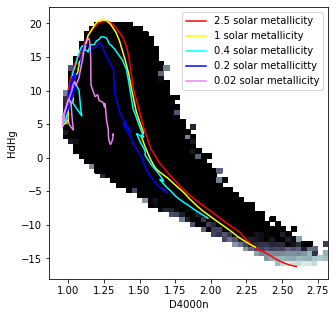

In [46]:
fig, axs=plt.subplots(figsize=(5,5))
axs.pcolormesh(x,y,med_logmwage.statistic,cmap=cm.bone, vmin=10.0)
plt.plot(d4000nssp_matrix[...,5], hghdssp_matrix[...,5], c='red', label='2.5 solar metallicity')
plt.plot(d4000nssp_matrix[...,4], hghdssp_matrix[...,4], c='yellow', label='1 solar metallicity')
plt.plot(d4000nssp_matrix[...,3], hghdssp_matrix[...,3], c='cyan', label='0.4 solar metallicity')
plt.plot(d4000nssp_matrix[...,2], hghdssp_matrix[...,2], c='blue', label='0.2 solar metallicitty')
plt.plot(d4000nssp_matrix[...,1], hghdssp_matrix[...,1], c='violet', label='0.02 solar metallicity')
#plt.plot(d4000nssp_matrix[...,0], hghdssp_matrix[...,0], c='green', label='0.005 solar metallicity')

axs.set_xlabel('D4000n')
axs.set_ylabel('HdHg')
axs.legend(loc='upper right')

In [47]:
#fig.savefig(workdir+'ssp_different_metallicity.png')

In [48]:
age5090_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(age50-age90),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
age1050_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(age10-age50),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
age50_age90=stats.binned_statistic_2d(D4000n,HdHg,(age50-age90),bins=n_bins,statistic='median',expand_binnumbers=True )
age10_age50=stats.binned_statistic_2d(D4000n,HdHg,(age10-age50),bins=n_bins,statistic='median',expand_binnumbers=True )

<ipython-input-48-6b01e6971603>:1: RuntimeWarning: divide by zero encountered in log10
  age5090_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(age50-age90),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
<ipython-input-2-6f683c45c760>:4: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
<ipython-input-48-6b01e6971603>:2: RuntimeWarning: divide by zero encountered in log10
  age1050_rms1684=stats.binned_statistic_2d(D4000n,HdHg,np.log10(age10-age50),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )


In [49]:
#age5090nb_rms1684=stats.binned_statistic_2d(D4000n_nb,HdHg_nb,np.log10(age50_nb-age90_nb),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
#age1090nb_rms1684=stats.binned_statistic_2d(D4000n_nb,HdHg_nb,np.log10(age10_nb-age90_nb),bins=n_bins,statistic=rms_1684,expand_binnumbers=True )
#age10_age90nb=stats.binned_statistic_2d(D4000n_nb,HdHg_nb,age10_nb-age90_nb,bins=n_bins,statistic='median',expand_binnumbers=True )
#age25_age90nb=stats.binned_statistic_2d(D4000n_nb,HdHg_nb,(age25_nb-age90_nb),bins=n_bins,statistic='median',expand_binnumbers=True )

<ipython-input-53-d1cf6bd35faf>:2: RuntimeWarning: divide by zero encountered in log10
  plt1=axs1[0,1].pcolormesh(x,y,np.log10(age50_age90.statistic),cmap=cm.rainbow,vmin=8.0,vmax=10.00)


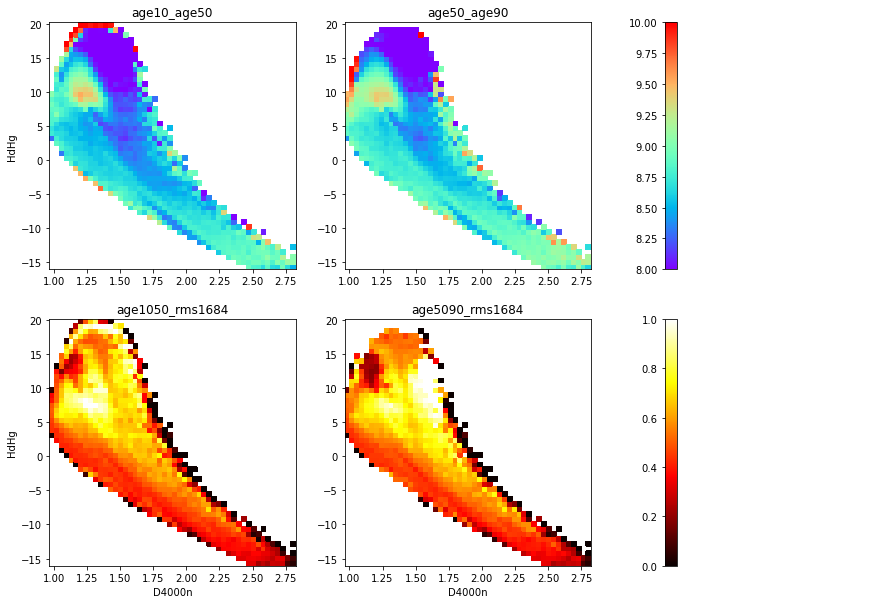

In [53]:
fig1,axs1=plt.subplots(2,3,figsize=(15,10))
plt1=axs1[0,1].pcolormesh(x,y,np.log10(age50_age90.statistic),cmap=cm.rainbow,vmin=8.0,vmax=10.00)
plt2=axs1[1,1].pcolormesh(x,y,(age5090_rms1684.statistic), cmap=cm.hot,vmin=0.0,vmax=1.0)
fig.colorbar(plt2, ax=[axs1[1,2]], location='left')
fig.colorbar(plt1, ax=[axs1[0,2]], location='left')

axs1[1,1].set_xlabel('D4000n')
axs1[0,0].set_ylabel('HdHg')
axs1[1,0].set_xlabel('D4000n')
axs1[1,0].set_ylabel('HdHg')
axs1[0,2].axis('off')
axs1[1,2].axis('off')
axs1[1,1].set_title('age5090_rms1684')
axs1[0,1].set_title('age50_age90')      
axs1[1,0].set_title('age1050_rms1684')
axs1[0,0].set_title('age10_age50')      

axs1[0,0].pcolormesh(x,y,np.log10(age10_age50.statistic),cmap=cm.rainbow,vmin=8.0,vmax=10.00)
axs1[1,0].pcolormesh(x,y,(age1050_rms1684.statistic), cmap=cm.hot,vmin=0.0,vmax=1.0)

In [51]:
np.size(age90)

500000

In [52]:
age50[28]-age90[28]

0.0